In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

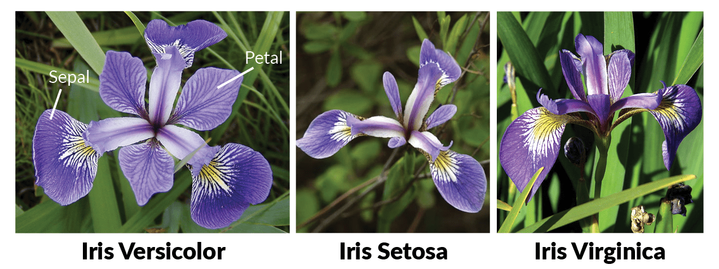

In [16]:
df = pd.read_csv('iris.csv')

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


#### **EDA**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.057,0.436,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.758,1.765,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.762,0.100,0.300,1.300,1.800,2.500


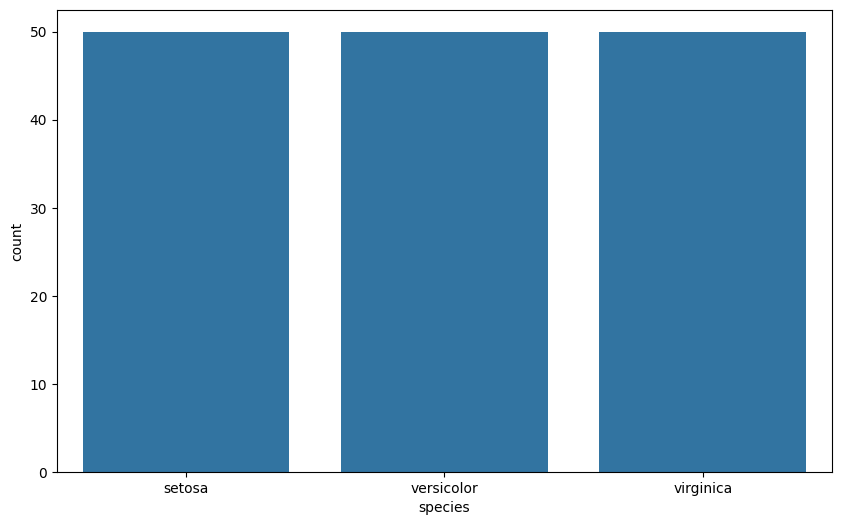

In [20]:
sns.countplot(data=df, x='species');

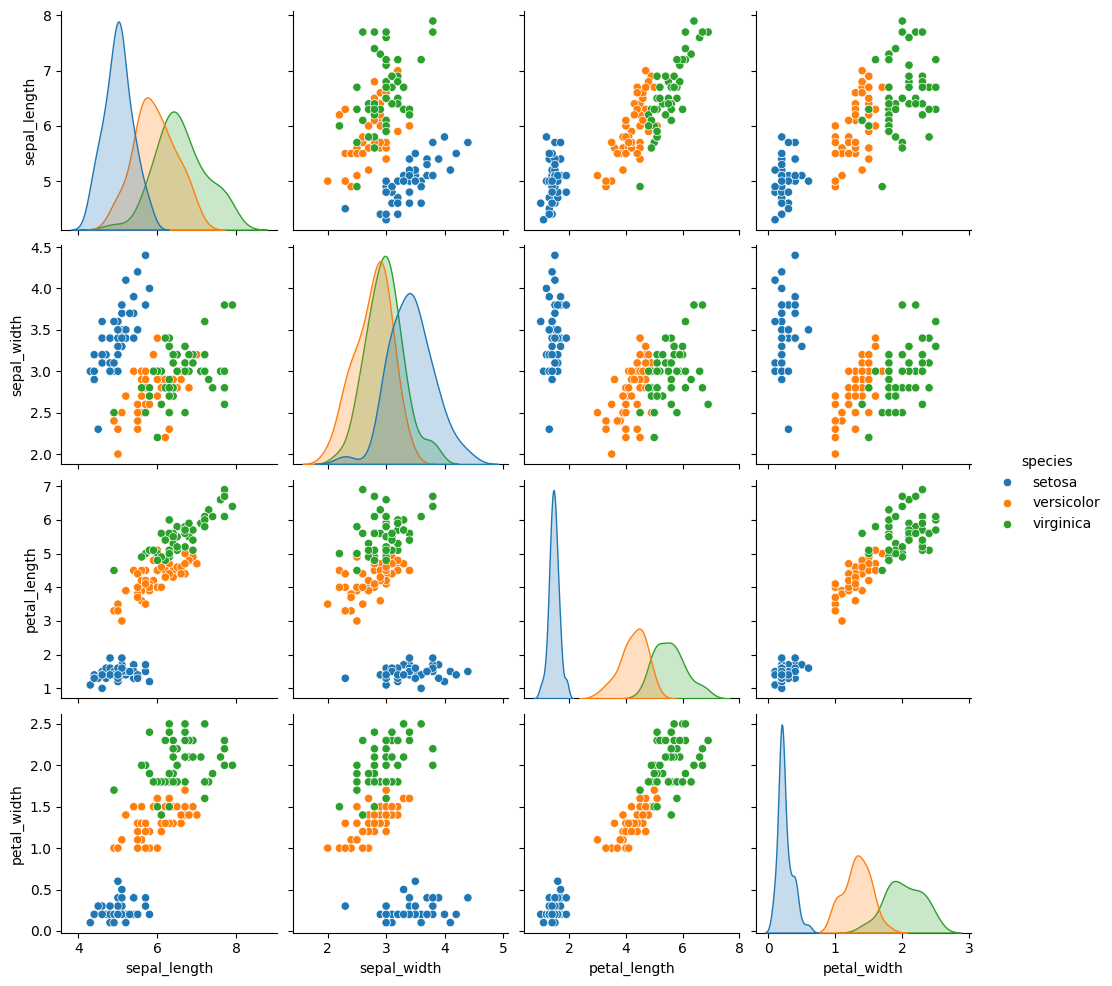

In [21]:
sns.pairplot(df, hue='species');

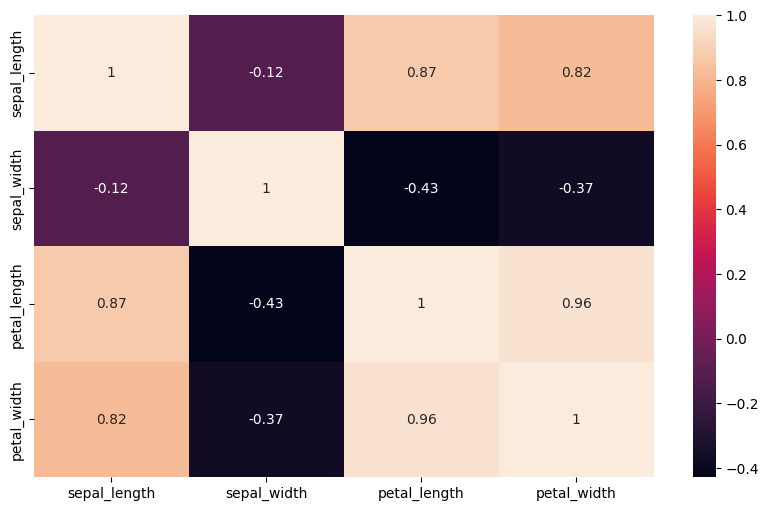

In [23]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [45]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

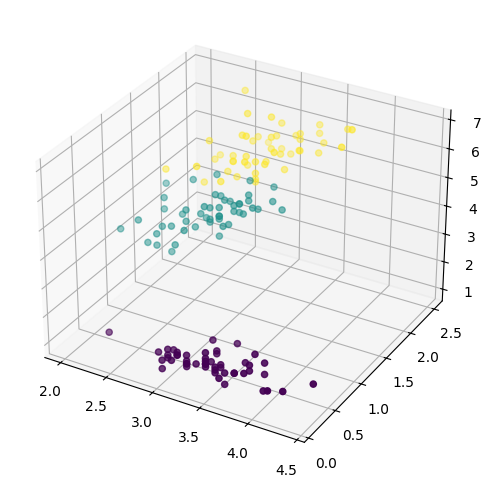

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
color = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'], df['petal_width'], df['petal_length'], c=color);
fig.show()

In [42]:
import plotly.express as px

In [ ]:
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
fig=px.scatter_3d(df, x = "sepal_width", y = "petal_width", z = "petal_length", color = colors)
fig.show()

#### **Train Test Split and Scaling**

In [52]:
X = df.drop("species", axis = 1)
y = df["species"]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Modelling and Model Performance**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#### **With Default Parameters**

In [61]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred= log_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [64]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.97574947e-01, 2.42503754e-03, 1.54293514e-08],
       [9.92629804e-01, 7.37006329e-03, 1.32922697e-07],
       [9.73790847e-01, 2.62066733e-02, 2.47982136e-06],
       [4.02847906e-04, 3.54599015e-01, 6.44998137e-01],
       [9.14885119e-03, 8.51714939e-01, 1.39136210e-01],
       [1.01797139e-03, 3.28773330e-01, 6.70208699e-01],
       [6.10449788e-04, 6.45974426e-01, 3.53415124e-01],
       [8.19190985e-03, 8.86796207e-01, 1.05011883e-01],
       [2.20541739e-04, 1.87962520e-01, 8.11816938e-01],
       [9.13848213e-01, 8.61499725e-02, 1.81402681e-06],
       [7.33058032e-04, 1.60762050e-01, 8.38504892e-01],
       [9.97950399e-01, 2.04959066e-03, 1.07662632e-08],
       [9.40317983e-01, 5.96797910e-02, 2.22606251e-06],
       [1.77758388e-06, 2.64146465e-02, 9.73583576e-01],
       [5.71832608e-03, 3.89263746e-01, 6.05017928e-01],
       [1.35583879e-02, 9.04991459e-01, 8.14501527e-02],
       [9.63103339e-02, 8.46121697e-01, 5.75679695e-02],
       [5.14009832e-02, 8.75025

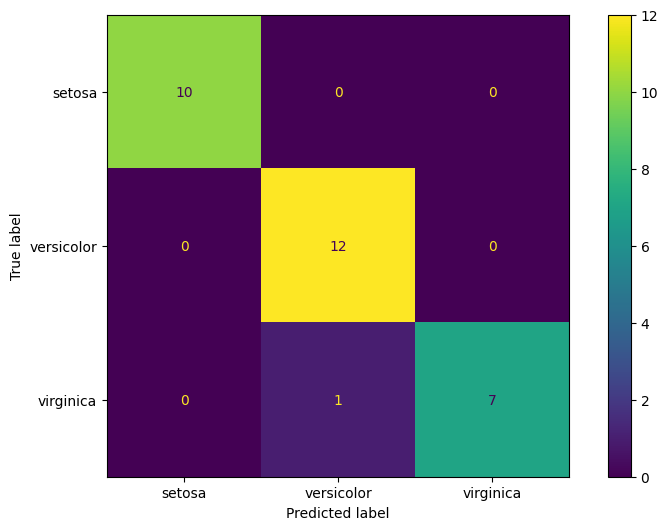

In [66]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test);

In [67]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [68]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



#### **Cross Validation**

In [70]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], cv=10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]


test_accuracy             0.950
test_precision_weighted   0.960
test_recall_weighted      0.950
test_f1_weighted          0.949
dtype: float64

#### **CV for Versicolor**

In [71]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [72]:
f1_versicolor = make_scorer(f1_score, average = None, labels = ['versicolor'])
precision_versicolor = make_scorer(precision_score, average = None, labels = ['versicolor'])
recall_versicolor = make_scorer(recall_score, average = None, labels = ['versicolor'])

In [75]:
model = LogisticRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring={'precision_versicolor': precision_versicolor, 'recall_versicolor':recall_versicolor, 'f1_versicolor':f1_versicolor}, cv=10)
df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_precision_versicolor   0.940
test_recall_versicolor      0.925
test_f1_versicolor          0.924
dtype: float64

#### **Class Prediction**

In [76]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]

In [78]:
test_data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
25,5.000,3.000,1.600,0.200,setosa,setosa,0.882,0.118,0.000
42,4.400,3.200,1.300,0.200,setosa,setosa,0.985,0.015,0.000
114,5.800,2.800,5.100,2.400,virginica,virginica,0.000,0.029,0.971
43,5.000,3.500,1.600,0.600,setosa,setosa,0.974,0.026,0.000
65,6.700,3.100,4.400,1.400,versicolor,versicolor,0.014,0.875,0.111
1,4.900,3.000,1.400,0.200,setosa,setosa,0.914,0.086,0.000
68,6.200,2.200,4.500,1.500,versicolor,versicolor,0.001,0.646,0.353
41,4.500,2.300,1.300,0.300,setosa,setosa,0.576,0.424,0.000
146,6.300,2.500,5.000,1.900,virginica,virginica,0.000,0.188,0.812
53,5.500,2.300,4.000,1.300,versicolor,versicolor,0.008,0.887,0.105


#### **With Best Parameters (GridSearchCV)**

In [ ]:
log_model = LogisticRegression()
